In [29]:
import random
import numpy as np

In [59]:
class KMeans:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
    
    def fit_predict(self, X):
        random_index = random.sample(range(0, X.shape[0]), self.n_clusters)        
        self.centroids = X[random_index]
        
        for i in range(0, self.max_iter):
            # assign clusters.
            cluster_group = self.assign_clusters(X)
            # move centroids.
            old_centroids = self.centroids
            self.centroids = self.move_centroids(X, cluster_group)
            # check finish.
            if(old_centroids == self.centroids).all():
                break
        
        return cluster_group
    
    def assign_clusters(self, X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                # calculating euclidean distance.
                distances.append(np.sqrt(np.dot(row - centroid, row - centroid)))                
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()
        
        return np.array(cluster_group)
    
    def move_centroids(self, X, cluster_group):
        new_centroids = []
        cluster_type = np.unique(cluster_group)
        
        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))
        
        return np.array(new_centroids)



In [60]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

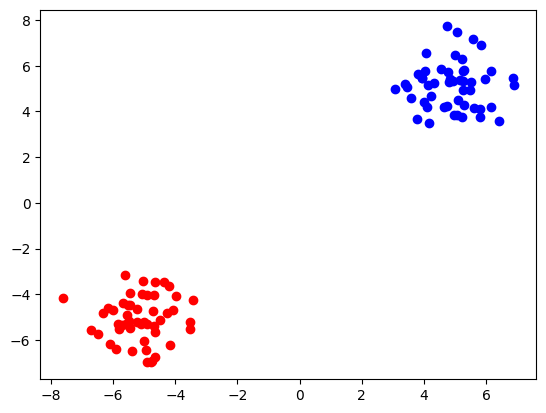

In [63]:
centroids = [(-5, -5), (5, 5)]
cluster_std = [1, 1]

X, y = make_blobs(n_samples=100, cluster_std=cluster_std, centers=centroids, n_features=2, random_state=42)

km = KMeans(2, 100)
y_means = km.fit_predict(X)
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], color='red')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], color='blue')
plt.show()